In [1]:
#####
# reference
# http://machinelearningmastery.com/machine-learning-in-python-step-by-step/
#####
#Check the versions of libraries
 
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 2.7.13 | packaged by conda-forge | (default, May  2 2017, 12:48:11) 
[GCC 4.8.2 20140120 (Red Hat 4.8.2-15)]
scipy: 0.19.1
numpy: 1.12.1
matplotlib: 2.0.2
pandas: 0.19.2
sklearn: 0.18.2


In [2]:
# Load libraries
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [19]:
# Load dataset
dataset = pandas.read_csv("datasets/datasets/iris.csv")


In [20]:
# shape
print(dataset.shape)

(150, 6)


In [18]:
print(dataset.info)

<bound method DataFrame.info of       sepal-length sepal-width petal-length petal-width      class
1.0            5.1         3.5          1.4         0.2     setosa
2.0            4.9           3          1.4         0.2     setosa
3.0            4.7         3.2          1.3         0.2     setosa
4.0            4.6         3.1          1.5         0.2     setosa
5.0              5         3.6          1.4         0.2     setosa
6.0            5.4         3.9          1.7         0.4     setosa
7.0            4.6         3.4          1.4         0.3     setosa
8.0              5         3.4          1.5         0.2     setosa
9.0            4.4         2.9          1.4         0.2     setosa
10.0           4.9         3.1          1.5         0.1     setosa
11.0           5.4         3.7          1.5         0.2     setosa
12.0           4.8         3.4          1.6         0.2     setosa
13.0           4.8           3          1.4         0.1     setosa
14.0           4.3           3

In [21]:
dataset.columns

Index([u'Unnamed: 0', u'Sepal.Length', u'Sepal.Width', u'Petal.Length',
       u'Petal.Width', u'Species'],
      dtype='object')

In [22]:
# descriptions
dataset.describe()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [24]:
print(dataset.groupby('Species').size())

Species
setosa        50
versicolor    50
virginica     50
dtype: int64


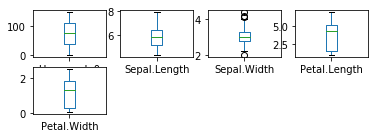

In [33]:
# box and whisker plots
%matplotlib inline
dataset.plot(kind='box', subplots=True,  layout=(4,4), sharex=False, sharey=False)
plt.show()

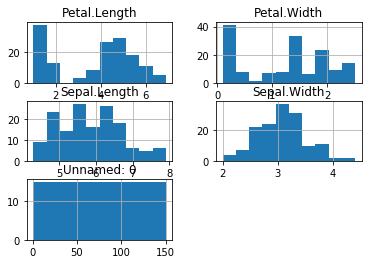

In [34]:
# histograms
dataset.hist()
plt.show()

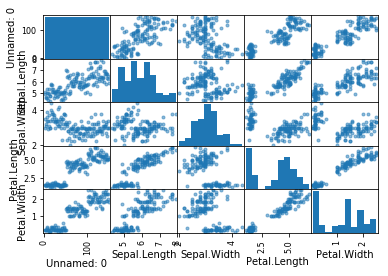

In [35]:
# scatter plot matrix
scatter_matrix(dataset)
plt.show()

In [36]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)


In [37]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [39]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
 kfold = model_selection.KFold(n_splits=10, random_state=seed)
 cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)



ValueError: Unknown label type: 'unknown'

IndexError: list index out of range

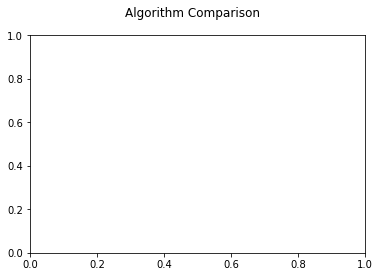

In [40]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [41]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

ValueError: Unknown label type: 'unknown'